Let's start with importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import plotly
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as ff
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='your-plotly-username', api_key='your-plotly-apikey')

from datetime import datetime

Then read the csv file and put it into dataframe

In [2]:
demog=pd.read_csv("future-volume-prediction/train/demographics.csv")
event_cal=pd.read_csv("future-volume-prediction/train/event_calendar.csv")
histo_vol=pd.read_csv("future-volume-prediction/train/historical_volume.csv")
ind_soda_sales=pd.read_csv("future-volume-prediction/train/industry_soda_sales.csv")
ind_vol=pd.read_csv("future-volume-prediction/train/industry_volume.csv")
pri_sales_pro=pd.read_csv("future-volume-prediction/train/price_sales_promotion.csv")
weather=pd.read_csv("future-volume-prediction/train/weather.csv")
vol_for=pd.read_csv("future-volume-prediction/test/volume_forecast.csv")
sku_rec=pd.read_csv("future-volume-prediction/test/sku_recommendation.csv")

Initially the data type in dataframe histo_vol column YearMonth is string type, so we need to convert it to datetime type

In [3]:
def convert_date (x):
    x = str(x)
    y = x[:4]
    m = x[4:]
    d = datetime.strptime("{0} {1} {2}".format(y,m,'01'), "%Y %m %d")
    return d

histo_vol['YearMonth'] = histo_vol['YearMonth'].apply(convert_date)

In [4]:
def check_missing(df_name):
    all_data_na = (df_name.isnull().sum() / len(df_name)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na != 0].index).sort_values(ascending=False)#[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(all_data_na)#.loc[(missing_data['Missing Ratio']==0)]

    
# Checking missing data percentage    
# cek persentase missing data
def no_missing(df_name):
    all_data_na = (df_name.isnull().sum() / len(df_name)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na != 0].index).sort_values(ascending=False)#[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(all_data_na)#.loc[(missing_data['Missing Ratio']==0)]
    
def all_missing(df_name):
    all_data_na = (df_name.isnull().sum() / len(df_name)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na < 100].index).sort_values(ascending=False)#[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    print(all_data_na)#.loc[(missing_data['Missing Ratio']==0)]

Let's start with basic data exploration.
Check how many SKU each Agency sells. The result will be shown in line chart and grab chart.

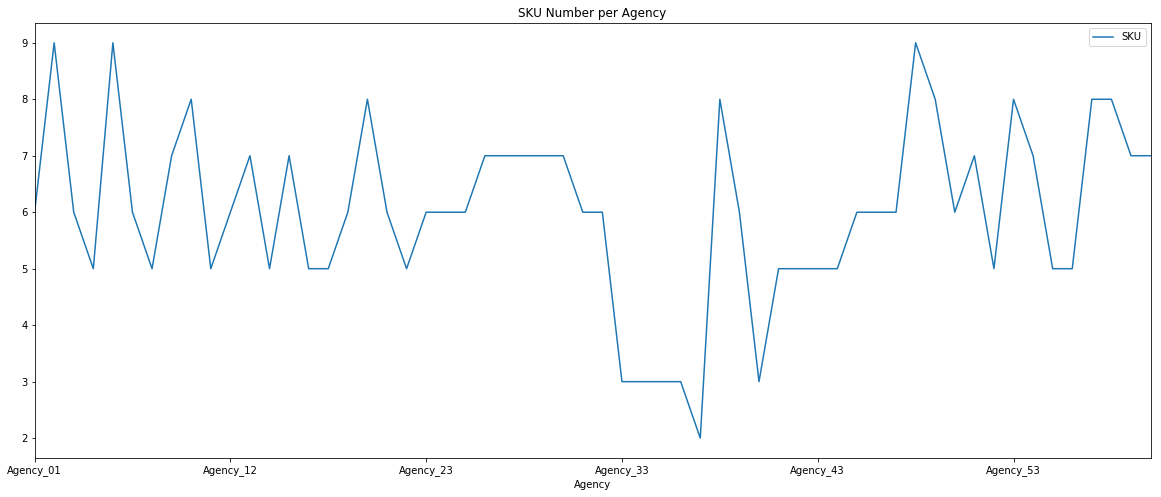

In [5]:
histo_sku=histo_vol.groupby(['Agency']).count()
histo_sku=histo_sku.drop(columns=['YearMonth','Volume'])
histo_sku['SKU']=abs(histo_sku['SKU']/60)
histo_sku.plot(y='SKU', figsize=(20,8), title='SKU Number per Agency')

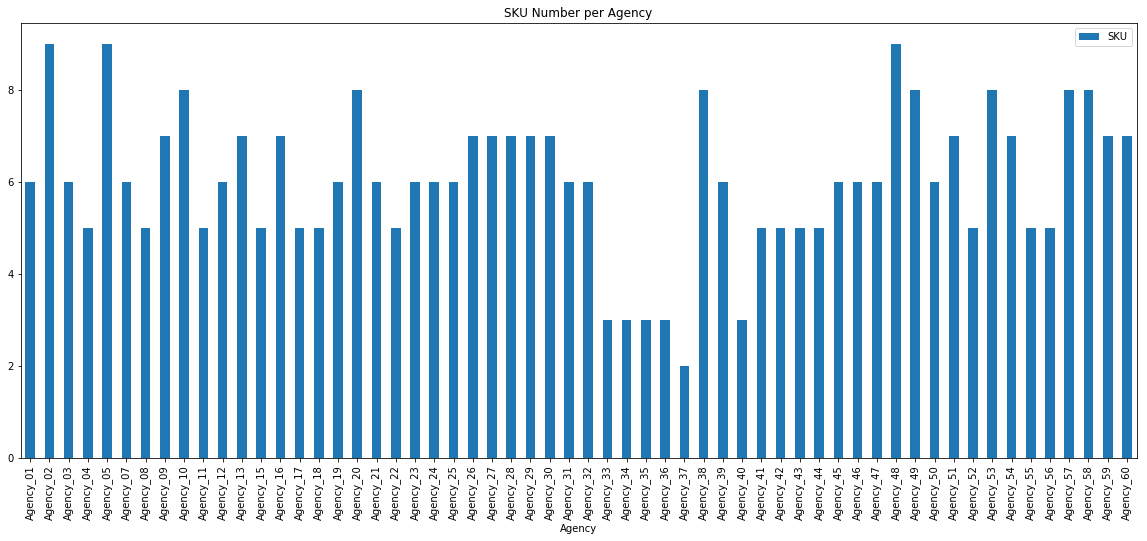

In [34]:
histo_sku.plot(kind='bar', y='SKU', figsize=(20,8), title='SKU Number per Agency')

Agency 2, 5, and 48 sell the most SKU with 9 SKUs

Let's see which SKU is the most popular among the agencies (how many agencies sells specific SKU). The result will be shown in line chart and grab chart.

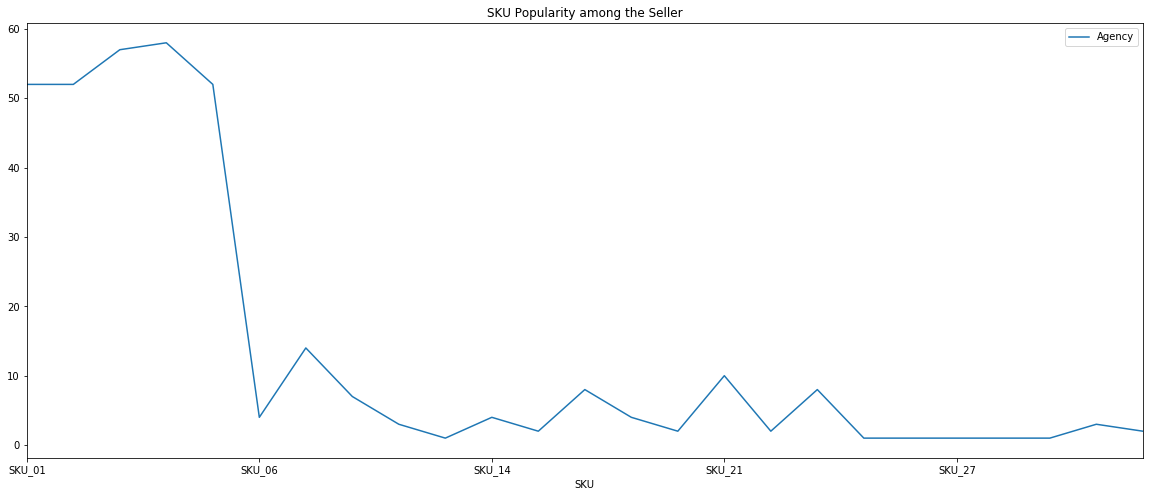

In [6]:
histo_skus=histo_vol.groupby(['SKU']).count()

histo_skus=histo_skus.drop(columns=['YearMonth','Volume'])
histo_skus['Agency']=abs(histo_skus['Agency']/60)
histo_skus.plot(y='Agency', figsize=(20,8), title='SKU Popularity among the Seller')


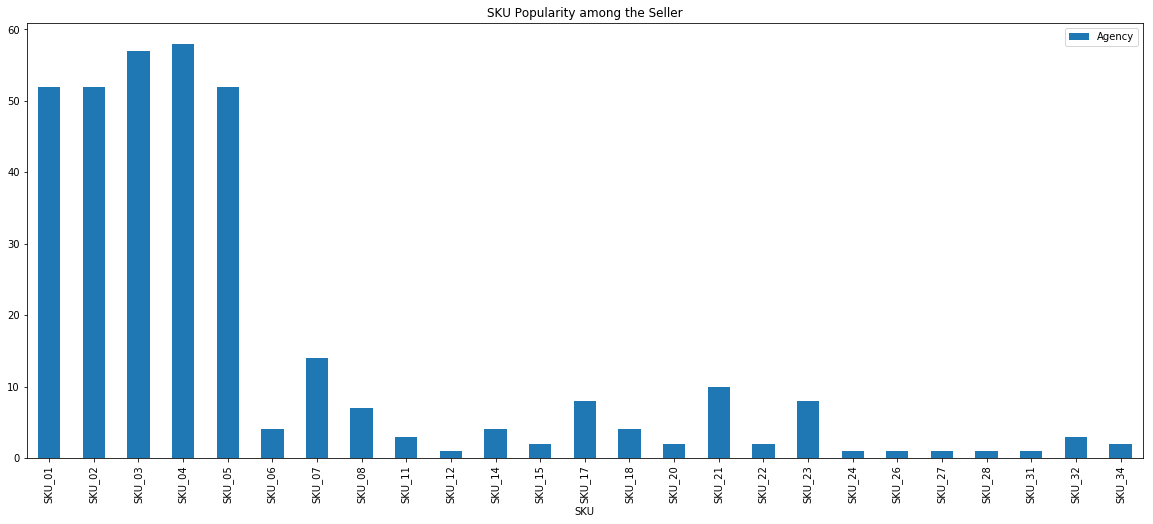

In [35]:
histo_skus.plot(kind='bar', y='Agency', figsize=(20,8), title='SKU Popularity among the Seller')

SKU 4 is the most popular SKU among the agencies because almost all agencies (58 agencies) sell it.

Now, let's check the most popular SKU among the customer (Total SKU volume sold). The result will be shown in line chart and grab chart.

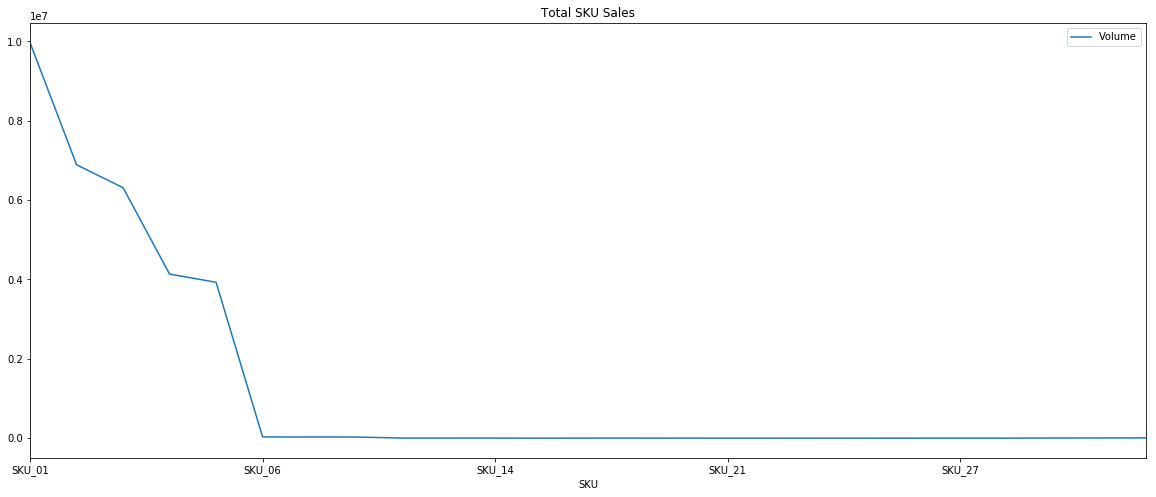

In [7]:
histo_vol.groupby(['SKU']).sum().plot(y='Volume', figsize=(20,8), title='Total SKU Sales')

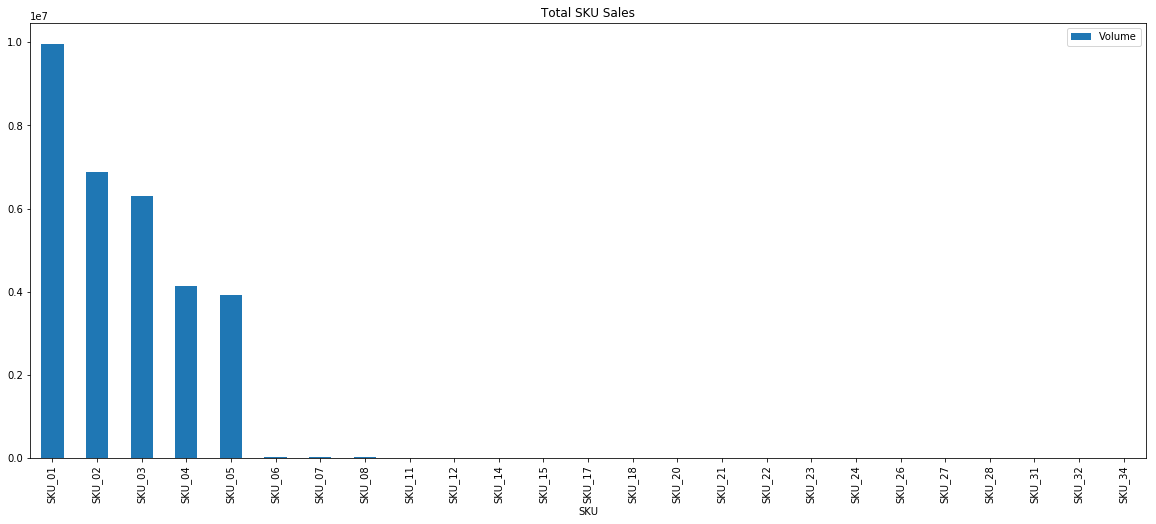

In [36]:
histo_vol.groupby(['SKU']).sum().plot(kind='bar', y='Volume', figsize=(20,8), title='Total SKU Sales')

SKU 1 is the most popular SKU among the buyer, with almost 10 million hectolitres sold.

In [8]:
histo_vol['year'] = pd.DatetimeIndex(histo_vol['YearMonth']).year
histo_vol['month']=pd.DatetimeIndex(histo_vol['YearMonth']).month

histo_vol2013= histo_vol.loc[(histo_vol['year']==2013)]
histo_2013=histo_vol2013.groupby('YearMonth',as_index=False).sum()
histo_2013['month'] = pd.DatetimeIndex(histo_2013['YearMonth']).month

histo_vol2014= histo_vol.loc[(histo_vol['year']==2014)]
histo_2014=histo_vol2014.groupby('YearMonth',as_index=False).sum()
histo_2014['month'] = pd.DatetimeIndex(histo_2014['YearMonth']).month

histo_vol2015= histo_vol.loc[(histo_vol['year']==2015)]
histo_2015=histo_vol2015.groupby('YearMonth',as_index=False).sum()
histo_2015['month'] = pd.DatetimeIndex(histo_2015['YearMonth']).month

histo_vol2016= histo_vol.loc[(histo_vol['year']==2016)]
histo_2016=histo_vol2016.groupby('YearMonth',as_index=False).sum()
histo_2016['month'] = pd.DatetimeIndex(histo_2016['YearMonth']).month

histo_vol2017= histo_vol.loc[(histo_vol['year']==2017)]
histo_2017=histo_vol2017.groupby('YearMonth',as_index=False).sum()
histo_2017['month'] = pd.DatetimeIndex(histo_2017['YearMonth']).month

#histo_2013#.plot(y='Volume', figsize=(20,8), title='SKU Popularity')

In [9]:
a1=go.Scatter(
    x=histo_2013['month'],
    y=histo_2013['Volume'], name='2013'
)   

a2=go.Scatter(
    x=histo_2014['month'],
    y=histo_2014['Volume'], name='2014'
)   

a3=go.Scatter(
    x=histo_2015['month'],
    y=histo_2015['Volume'], name='2015'
)   

a4=go.Scatter(
    x=histo_2016['month'],
    y=histo_2016['Volume'], name='2016'
)   

a5=go.Scatter(
    x=histo_2017['month'],
    y=histo_2017['Volume'], name='2017'
)   

a1=go.Scatter(
    x=histo_2013['month'],
    y=histo_2013['Volume'], name='2013'
)   


data=[a1,a2,a3,a4,a5]

layout = go.Layout(
    title='Volume Sales by Month',
    xaxis=dict(
        title='Month',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='basic-line')

In [15]:
demog = demog.rename(columns={'Avg_Population_2017': 'Population', 'Avg_Yearly_Household_Income_2017': 'Yearly Income'})